In [6]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

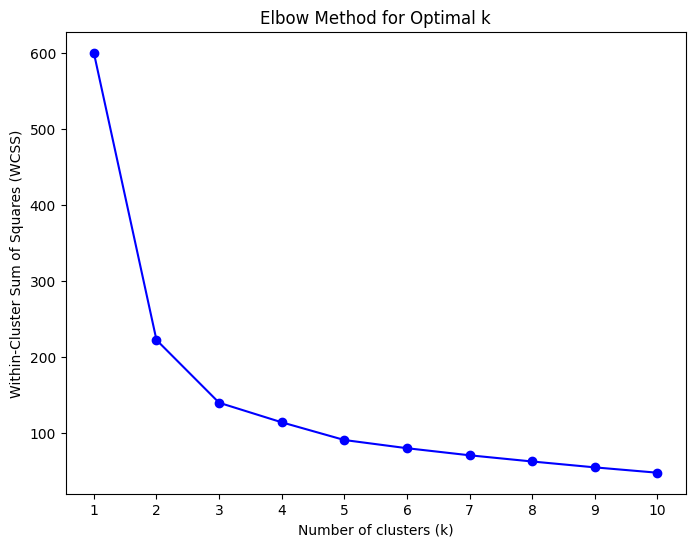

In [10]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11, 1), wcss, marker='o', color='b')
plt.xticks(range(1, 11))
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

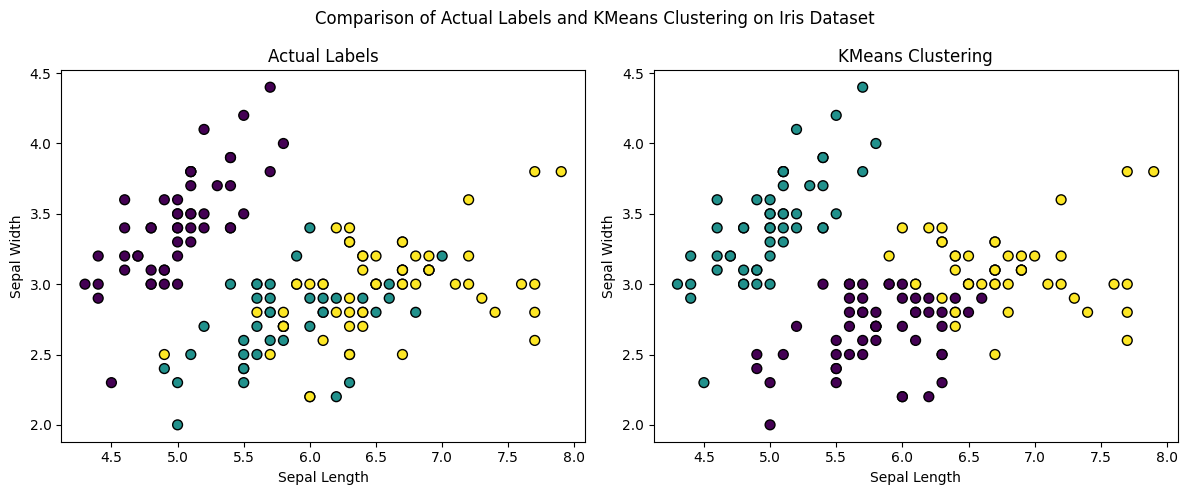

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax[0].set_title("Actual Labels")
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")

ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
ax[1].set_title("KMeans Clustering")
ax[1].set_xlabel("Sepal Length")
ax[1].set_ylabel("Sepal Width")

plt.suptitle("Comparison of Actual Labels and KMeans Clustering on Iris Dataset")
plt.tight_layout()
plt.show()